In [47]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (20, 7)
mpl.rcParams['axes.grid'] = False

In [48]:
df = pd.read_csv('/Users/ahmadabdullahtariq/Downloads/energydata_complete.csv',index_col='date',infer_datetime_format=True)

In [49]:
df = df.loc['2016-05-01':]
df = df.round(2)

In [14]:
df.head(3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.20,38.20,18.39,41.4,23.20,36.40,19.73,37.73,...,19.17,38.20,4.30,763.70,86.00,2.00,40.00,2.20,15.31,15.31
2016-05-01 00:10:00,60,0,21.15,38.17,18.39,41.5,23.13,36.47,19.70,37.66,...,19.13,38.29,4.28,763.72,86.33,2.17,38.17,2.22,11.24,11.24
2016-05-01 00:20:00,50,0,21.13,38.09,18.32,41.5,23.20,36.50,19.70,37.59,...,19.13,38.36,4.27,763.73,86.67,2.33,36.33,2.23,21.81,21.81


In [50]:
# How many rows per day? We know its every 10 min
# 24*60/10 =144

test_days = 2
test_ind = test_days*144

train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [21]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [53]:
scaled_train

array([[0.03896104, 0.        , 0.13798978, ..., 0.21301775, 0.30618371,
        0.30618371],
       [0.05194805, 0.        , 0.12947189, ..., 0.21420118, 0.22473484,
        0.22473484],
       [0.03896104, 0.        , 0.12606474, ..., 0.2147929 , 0.43626176,
        0.43626176],
       ...,
       [0.18181818, 0.        , 0.70017036, ..., 0.50118343, 0.33340004,
        0.33340004],
       [0.09090909, 0.        , 0.70017036, ..., 0.51952663, 0.78747248,
        0.78747248],
       [0.1038961 , 0.        , 0.70017036, ..., 0.53846154, 0.77286372,
        0.77286372]])

In [57]:
train.values

array([[ 50.  ,   0.  ,  21.2 , ...,   2.2 ,  15.31,  15.31],
       [ 60.  ,   0.  ,  21.15, ...,   2.22,  11.24,  11.24],
       [ 50.  ,   0.  ,  21.13, ...,   2.23,  21.81,  21.81],
       ...,
       [160.  ,   0.  ,  24.5 , ...,   7.07,  16.67,  16.67],
       [ 90.  ,   0.  ,  24.5 , ...,   7.38,  39.36,  39.36],
       [100.  ,   0.  ,  24.5 , ...,   7.7 ,  38.63,  38.63]])

In [75]:
# define generator
length = 144 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(train.values, train.values, length=length, batch_size=89)

In [76]:
X,y = generator[0]

In [77]:
train.head(3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.20,38.20,18.39,41.4,23.20,36.40,19.73,37.73,...,19.17,38.20,4.30,763.70,86.00,2.00,40.00,2.20,15.31,15.31
2016-05-01 00:10:00,60,0,21.15,38.17,18.39,41.5,23.13,36.47,19.70,37.66,...,19.13,38.29,4.28,763.72,86.33,2.17,38.17,2.22,11.24,11.24
2016-05-01 00:20:00,50,0,21.13,38.09,18.32,41.5,23.20,36.50,19.70,37.59,...,19.13,38.36,4.27,763.73,86.67,2.33,36.33,2.23,21.81,21.81


In [78]:
y

array([[50.  ,  0.  , 22.2 , ...,  0.9 , 22.88, 22.88],
       [50.  ,  0.  , 22.13, ...,  0.92, 26.85, 26.85],
       [60.  ,  0.  , 22.1 , ...,  0.93, 12.21, 12.21],
       ...,
       [80.  ,  0.  , 22.5 , ...,  0.37, 45.32, 45.32],
       [80.  ,  0.  , 22.5 , ...,  0.25,  1.29,  1.29],
       [70.  ,  0.  , 22.5 , ...,  0.13, 19.61, 19.61]])

In [79]:
y.shape

(89, 28)

In [80]:
X.shape

(89, 144, 28)

In [72]:
X

array([[[ 50.  ,   0.  ,  21.2 , ...,   2.2 ,  15.31,  15.31]],

       [[ 60.  ,   0.  ,  21.15, ...,   2.22,  11.24,  11.24]],

       [[ 50.  ,   0.  ,  21.13, ...,   2.23,  21.81,  21.81]],

       ...,

       [[120.  ,   0.  ,  21.7 , ...,   1.53,   8.07,   8.07]],

       [[120.  ,   0.  ,  21.79, ...,   1.15,  16.62,  16.62]],

       [[110.  ,   0.  ,  21.79, ...,   0.77,  47.09,  47.09]]])

In [24]:
len(scaled_train)

3565

In [25]:
len(generator) 

3421

In [26]:
# What does the first batch look like?
X,y = generator[0]

In [29]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03896104 0.         0.13798978 ... 0.14319527 0.75185111 0.75185111]
Predict this y: 
 [[0.03896104 0.         0.30834753 0.29439421 0.16038492 0.49182278
  0.0140056  0.36627907 0.24142857 0.24364791 0.12650602 0.36276002
  0.12       0.28205572 0.06169297 0.15759185 0.34582624 0.39585974
  0.09259259 0.39649608 0.18852459 0.96052632 0.59210526 0.1
  0.58333333 0.13609467 0.4576746  0.4576746 ]]


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [31]:
scaled_train.shape

(3565, 28)

In [32]:
# define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(100,input_shape=(length,scaled_train.shape[1])))

# Final Prediction (one neuron per feature)
model.add(Dense(scaled_train.shape[1]))

model.compile(optimizer='adam', loss='mse')

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [80]:
# define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(100,input_shape=(train_X.shape[1],train_X.shape[2])))

# Final Prediction (one neuron per feature)
model.add(Dense(train_X.shape[1]))

model.compile(optimizer='adam', loss='mse')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               51600     
_________________________________________________________________
dense (Dense)                (None, 28)                2828      
Total params: 54,428
Trainable params: 54,428
Non-trainable params: 0
_________________________________________________________________


In [34]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, 
                                           length=length, batch_size=batch_size)

In [35]:
model.fit_generator(generator,epochs=10,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
3421/3421 [==============================] - 117s 34ms/step - loss: 0.0114 - val_loss: 0.0096
Epoch 2/10
3421/3421 [==============================] - 119s 35ms/step - loss: 0.0079 - val_loss: 0.0100


In [36]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

<AxesSubplot:>

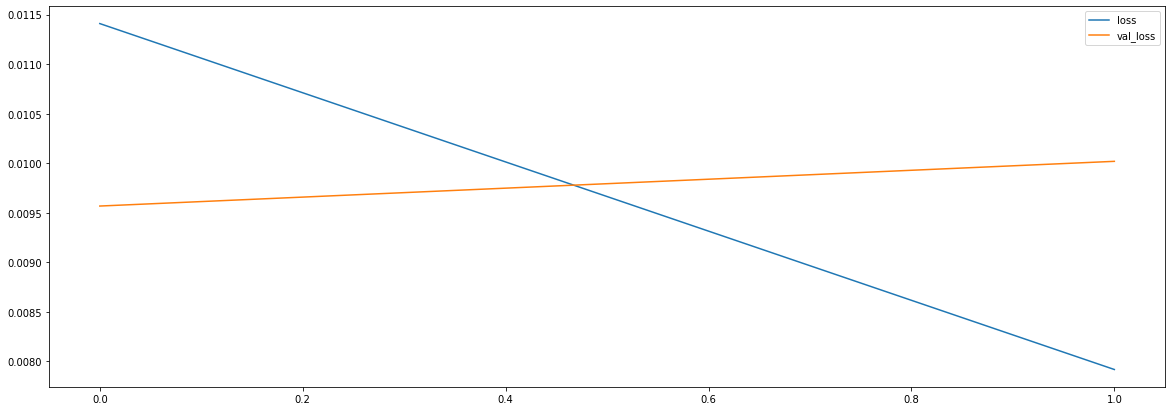

In [37]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [38]:
first_eval_batch = scaled_train[-length:]

In [39]:
first_eval_batch = first_eval_batch.reshape((1, length, scaled_train.shape[1]))

In [40]:
model.predict(first_eval_batch)

array([[ 0.09935611,  0.00604844,  0.7043987 ,  0.44379532,  0.55802983,
         0.47906163,  0.5026858 ,  0.44853583,  0.70022744,  0.4035566 ,
         0.30019525,  0.3569843 ,  0.66675997, -0.01557393,  0.63476324,
         0.43859276,  0.55765665,  0.3148888 ,  0.5878094 ,  0.3788429 ,
         0.60861146,  0.5690886 ,  0.44393027,  0.18863183,  0.53298175,
         0.55697197,  0.5451599 ,  0.5554879 ]], dtype=float32)

In [41]:
scaled_test[0]

array([0.19480519, 0.        , 0.70017036, 0.3920434 , 0.53007217,
       0.41064526, 0.40616246, 0.41913319, 0.72714286, 0.4115245 ,
       0.30722892, 0.36445121, 0.66777778, 0.        , 0.61119082,
       0.39840637, 0.51618399, 0.32953105, 0.53703704, 0.34024896,
       0.6057377 , 0.52631579, 0.41881579, 0.2       , 0.55283333,
       0.53372781, 0.76305783, 0.76305783])

In [42]:
n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [43]:
true_predictions = scaler.inverse_transform(test_predictions)

In [45]:
true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns)

In [46]:
true_predictions

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,96.504208,0.181453,24.524820,39.290941,24.348632,36.570843,25.689177,37.256298,24.101592,37.614387,...,22.274171,38.067102,16.550120,757.075220,57.738700,1.886318,36.978905,8.012826,27.251639,27.767729
1,97.213588,0.274241,24.597851,40.005995,24.343124,36.989647,25.919672,37.611689,24.153513,37.957827,...,22.404397,38.419373,16.412200,757.177441,59.424500,1.876508,35.322326,8.482353,27.667180,27.556593
2,103.269979,0.287875,24.670593,40.677500,24.356792,37.518184,26.129236,37.938235,24.206317,38.444356,...,22.521238,38.716849,16.325853,757.315986,61.456007,1.849841,33.835194,8.925639,27.872779,27.724631
3,109.022588,0.306488,24.743325,41.349002,24.374176,38.130079,26.337216,38.247236,24.259314,38.998427,...,22.634619,39.013760,16.249948,757.461651,63.464529,1.820580,32.448595,9.372241,28.089645,27.896716
4,114.264053,0.339154,24.820268,42.029739,24.396754,38.793821,26.547032,38.545011,24.316492,39.599485,...,22.746987,39.309758,16.171396,757.609891,65.482936,1.790329,31.164552,9.824603,28.319754,28.086422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,169.913070,2.188037,28.277150,57.987183,27.426536,55.583239,30.607708,44.373075,26.185783,57.531867,...,25.077281,48.062108,14.791904,754.714957,100.586430,3.760720,23.861226,17.852467,35.946745,33.577324
284,169.805181,2.193806,28.272873,57.800226,27.300352,55.639450,30.607802,44.333918,26.158568,57.449323,...,25.044059,48.025854,14.605860,754.895666,100.390926,3.950851,24.516468,17.587803,35.988780,33.617250
285,169.581520,2.193794,28.266213,57.606700,27.172340,55.686580,30.604523,44.288614,26.131009,57.353852,...,25.011373,47.993673,14.412612,755.074641,100.244717,4.128301,25.138737,17.325694,36.025751,33.655297
286,169.240161,2.188104,28.257195,57.407798,27.043060,55.725098,30.597816,44.237780,26.103101,57.246749,...,24.979394,47.965826,14.212882,755.252185,100.146218,4.293493,25.727818,17.066582,36.058026,33.691753
